

# **Implement the naïve Bayesian classifier**
### **Name: Tarun**

### **Date: 09/November/2021**



*   Statstical Method for Classification
*   Supervised learnig model
*   Assumes an underlying probabilistic model, the Bayes therom.
*   Can solve problems involving both categorical and continous values attributes.
*   Named after Thomas Bayes, who proposed the Bayes Therom



In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
# importing libearies

import pandas as pd
import numpy as np

import seaborn as ns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
## IMPORTING DATASET

### The Interview Attendance Problem
##### Predict which candidates will attend the intervew
df = pd.read_csv("/content/gdrive/MyDrive/ML_Lab/Interview.csv")
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


## ANALYZING THE DATA

In [ ]:
df.shape

(1234, 28)

In [ ]:
df.describe()

,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

In [ ]:
df.isnull().sum()

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

In [ ]:
df = df.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],axis = 1)

In [ ]:
df[df['Date of Interview'].isna() == True]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(1233, axis = 0)

In [ ]:
df2 = df[['Industry',
       'Position to be closed', 'Interview Type','Gender','Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status']]

In [ ]:
def func():
    
    for i in df2.columns:
        print(np.unique(pd.DataFrame(df2[i].value_counts()).reset_index()['index']).tolist())

In [ ]:
func()

['BFSI', 'Electronics', 'IT', 'IT Products and Services', 'IT Services', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Sceduled walkin', 'Scheduled ', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin ']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['NO', 'Na', 'No', 'Not yet', 'Yes', 'Yet to confirm', 'yes']
['Na', 'No', 'Not Sure', 'Not sure', 'Yes', 'cant Say', 'yes']
['Na', 'No', 'No Dont', 'Yes', 'yes']
['Na', 'No', 'No I have only thi number', 'Yes', 'na', 'yes']
['Na', 'No', 'No- will take it soon', 'Not Yet', 'Not yet', 'Yes', 'na', 'yes']
['Na', 'No', 'No- I need to check', 'Yes', 'na', 'no', 'yes']
['Havent Checked', 'Na', 'Need To Check', 'No', 'Not Sure', 'Not sure', 'Not yet', 'Yes', 'Yet to Check', 'na', 'no', 'yes']
['10.30 Am', '11:00 AM', 'NO', 'No', 'Uncertain', 'Yes', 'yes']
['NO', 'No', 'No ', 'Yes', 'no', 'no ', 'yes',

## CLEANING THE DATA

In [ ]:
df2 = df2 .replace(['Sceduled walkin', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin '], 'Walk-in')
df2  = df2 .replace(['Scheduled '], 'Scheduled')
df2  = df2 .replace(['Yes', 'yes', 'yes ', 'YES', ' yes', 'Y','10.30 Am', '11:00 AM'], 'y')
df2  = df2 .replace(['No', 'no', 'no ', 'NO', ' no', 'N', 'Na','na','No I have only thi number',
                        'No- will take it soon', 'n','Havent Checked','No ','No Dont','Not Yet'], 'n')
df2  = df2 .replace(['Havent Checked', 'Need To Check', 'Not Sure', 'Not sure', 'Not yet', 'Yet to Check', 
                         'Yet to confirm','cant Say','No- I need to check'], 'Uncertain')
df2 = df2.replace(['IT Products and Services', 'IT Services'], 'IT')

In [ ]:
def func():
    
    for i in df2.columns:
        print(np.unique(pd.DataFrame(df2[i].value_counts()).reset_index()['index']).tolist())
        #print(uni)

In [ ]:
func()

['BFSI', 'Electronics', 'IT', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Scheduled', 'Walk-in']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['Married', 'Single']


In [ ]:
df2.columns

Index(['Industry', 'Position to be closed', 'Interview Type', 'Gender',
       'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [ ]:
df2.isnull().sum()

Industry                                                                                                0
Position to be closed                                                                                   0
Interview Type                                                                                          0
Gender                                                                                                  0
Interview Venue                                                                                         0
Have you obtained the necessary permission to start at the required time                              204
Hope there will be no unscheduled meetings                                                            247
Can I Call you three hours before the interview and follow up on your attendance for the interview    247
Can I have an alternative number/ desk number. I assure you that I will not trouble you too much      247
Have you taken a printout of your updated resu

In [ ]:
df2 = df2.fillna('n')
df2.isnull().sum().sum()

0

In [ ]:
y = pd.DataFrame(df2.groupby(by = ['Marital Status', 'Observed Attendance'])
                 ['Expected Attendance'].count()).reset_index()

## LabelEncoder

* It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df3 = df2.apply(le.fit_transform)

names = ['No', 'Yes']

In [ ]:
X = df3.drop(['Observed Attendance','Expected Attendance'], axis = 1)
y = df3['Observed Attendance']

## Split dataset into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
def model_fit(x):
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    model_fit.accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy Score',accuracy_score(y_pred, y_test))
    print(classification_report(y_pred, y_test))
        
    classes = names
    
    model_cm = ConfusionMatrix(
    x, classes = classes,
    label_encoder = {0 : 'No', 1 : 'Yes'})
    
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    
    model_cm.poof()  

### Naive Bayes classifier calculates the probability of an event in the following steps:

> Step 1: Calculate the prior probability for given class labels

> Step 2: Find Likelihood probability with each attribute for each class

> Step 3: Put these value in Bayes Formula and calculate posterior probability.

> Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

## Accuracy Analysis

Accuracy Score 0.7206477732793523
              precision    recall  f1-score   support

           0       0.47      0.62      0.54        64
           1       0.85      0.75      0.80       183

    accuracy                           0.72       247
   macro avg       0.66      0.69      0.67       247
weighted avg       0.75      0.72      0.73       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


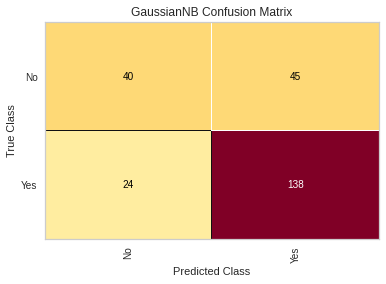

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_fit(GaussianNB())
Gaussian = model_fit.accuracy